In [121]:
import pandas as pd

# Пути к файлам
train_path = r'C:\Users\user\Desktop\Интенсив.py\train (3).csv'
test_path = r'C:\Users\user\Desktop\Интенсив.py\test.csv'
output_path = r'C:\Users\user\Desktop\Интенсив.py\test_train_merged.csv'

try:
    # Чтение файлов с преобразованием даты
    df_train = pd.read_csv(
        train_path,
        parse_dates=['dt'],  # Укажите имя столбца с датой
        dayfirst=True
    )
    
    df_test = pd.read_csv(
        test_path,
        parse_dates=['dt'],  # Убедитесь, что имя столбца совпадает
        dayfirst=True
    )

    # Проверка формата даты
    print("Пример даты из train:", df_train['dt'].iloc[0])
    print("Пример даты из test:", df_test['dt'].iloc[0])

    # Объединение данных
    merged_df = pd.concat([df_train, df_test], ignore_index=True)

    # Сортировка по дате
    merged_df = merged_df.sort_values('dt').reset_index(drop=True)

    # Проверка типов данных
    print("\nТип данных столбца dt:", merged_df['dt'].dtype)

    # Сохранение с сохранением формата даты
    merged_df.to_csv(output_path, index=False, date_format='%Y-%m-%d')
    print(f"\nФайл успешно сохранен: {output_path}")
    print(f"Общее количество строк: {len(merged_df)}")
    print(f"Диапазон дат: {merged_df['dt'].min()} - {merged_df['dt'].max()}")

except Exception as e:
    print(f"\nОшибка: {str(e)}")
    print("Рекомендации:")
    print("1. Проверьте имена столбцов с датами в обоих файлах")
    print("2. Убедитесь в совпадении форматов дат")
    print("3. Проверьте наличие файлов по указанным путям")

Пример даты из train: 2015-01-05 00:00:00
Пример даты из test: 2022-09-05 00:00:00

Тип данных столбца dt: object

Файл успешно сохранен: C:\Users\user\Desktop\Интенсив.py\test_train_merged.csv
Общее количество строк: 428
Диапазон дат: 2015-01-05 00:00:00 - 2023-03-13 00:00:00


Чистка файла макропоказатели

In [3]:
import pandas as pd

# Загрузка данных из CSV файла
file_path = r'C:\Users\user\Desktop\Интенсив.py\Макропоказатели.csv'
data = pd.read_csv(file_path)

# Удаление столбцов с более чем 75% пропусков
threshold = len(data) * 0.75
data_cleaned = data.dropna(thresh=threshold, axis=1)

# Заполнение оставшихся пропусков модой
for column in data_cleaned.columns:
    mode_value = data_cleaned[column].mode()[0]  # Вычисляем моду
    data_cleaned[column].fillna(mode_value, inplace=True)  # Заполняем пропуски модой

# Сохранение очищенных данных в новый CSV файл (по желанию)
data_cleaned.to_csv(r'C:\Users\user\Desktop\Интенсив.py\Очищенные_данные.csv', index=False)

print("Данные очищены и сохранены.")

Данные очищены и сохранены.


C:\Users\user\AppData\Local\Temp\ipykernel_4632\1414771420.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(mode_value, inplace=True)  # Заполняем пропуски модой
C:\Users\user\AppData\Local\Temp\ipykernel_4632\1414771420.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column].fillna(mode_value,

In [24]:
import pandas as pd

# Загрузка CSV-файлов
df = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Грузоперевозки.csv')
dq = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Данные-рынка-стройматериалов.csv')
dw = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Индекс-LME.csv')
de = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Макропоказатели_Чистык.csv')
dr = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Показатели-рынка-металла.csv')
dt = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Топливо.csv')
dy = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Цены-на-сырье.csv')
chmf = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\CHMF Акции.csv')
magn = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\MAGN Акции.csv')
nlmk = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\NLMK Акции.csv')

# Список всех DataFrame
dataframes = {
    "Грузоперевозки": df,
    "Данные-рынка-стройматериалов": dq,
    "Индекс-LME": dw,
    "Макропоказатели_Чистык": de,
    "Показатели-рынка-металла": dr,
    "Топливо": dt,
    "Цены-на-сырье": dy,
    "CHMF Акции": chmf,
    "MAGN Акции": magn,
    "NLMK Акции": nlmk
}

# Функция для преобразования первой колонки в формат datetime
def convert_first_column_to_datetime(dataframe):
    first_column = dataframe.columns[0]  # Название первой колонки
    dataframe[first_column] = pd.to_datetime(dataframe[first_column], errors='coerce')  # Преобразование в datetime
    return dataframe

# Применение функции ко всем DataFrame
for name, dataframe in dataframes.items():
    if not dataframe.empty:  # Проверка, что DataFrame не пустой
        dataframe = convert_first_column_to_datetime(dataframe)  # Преобразование первой колонки
        first_column = dataframe.columns[0]  # Название первой колонки
        first_column_type = dataframe[first_column].dtype  # Тип данных первой колонки
        num_rows = len(dataframe)  # Количество строк
        num_columns = len(dataframe.columns)  # Количество столбцов

        print(f"DataFrame: {name}")
        print(f"  - Первая колонка: {first_column}")
        print(f"  - Тип данных первой колонки: {first_column_type}")
        print(f"  - Количество строк: {num_rows}")
        print(f"  - Количество столбцов: {num_columns}")
        print(f"  - Пример данных первой колонки: {dataframe[first_column].head(3).to_list()}")
        print()
    else:
        print(f"DataFrame: {name} пустой.")

DataFrame: Грузоперевозки
  - Первая колонка: dt
  - Тип данных первой колонки: datetime64[ns]
  - Количество строк: 302
  - Количество столбцов: 2
  - Пример данных первой колонки: [Timestamp('2017-09-06 00:00:00'), Timestamp('2017-09-13 00:00:00'), Timestamp('2017-09-20 00:00:00')]

DataFrame: Данные-рынка-стройматериалов
  - Первая колонка: dt
  - Тип данных первой колонки: datetime64[ns]
  - Количество строк: 25
  - Количество столбцов: 15
  - Пример данных первой колонки: [Timestamp('2021-04-30 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-30 00:00:00')]

DataFrame: Индекс-LME
  - Первая колонка: дата
  - Тип данных первой колонки: datetime64[ns]
  - Количество строк: 517
  - Количество столбцов: 2
  - Пример данных первой колонки: [Timestamp('2021-02-12 00:00:00'), Timestamp('2021-02-15 00:00:00'), Timestamp('2021-02-16 00:00:00')]

DataFrame: Макропоказатели_Чистык
  - Первая колонка: dt
  - Тип данных первой колонки: datetime64[ns]
  - Количество строк: 1672


C:\Users\user\AppData\Local\Temp\ipykernel_4632\58977718.py:32: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataframe[first_column] = pd.to_datetime(dataframe[first_column], errors='coerce')  # Преобразование в datetime


In [26]:
dw.info()
chmf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   дата    516 non-null    datetime64[ns]
 1   цена    517 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 8.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1054 non-null   datetime64[ns]
 1   Price     1054 non-null   object        
 2   Open      1054 non-null   object        
 3   High      1054 non-null   object        
 4   Low       1054 non-null   object        
 5   Vol.      1053 non-null   object        
 6   Change %  1054 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 57.8+ KB


In [122]:
import pandas as pd

# Загрузка основного файла train (3).csv
train_df = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\test_train_merged.csv')

# Загрузка остальных CSV-файлов
df = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Грузоперевозки.csv')
dq = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Данные-рынка-стройматериалов.csv')
dw = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Индекс-LME.csv')
de = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Макропоказатели_Чистык.csv')
dr = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Показатели-рынка-металла.csv')
dt = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Топливо.csv')
dy = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Цены-на-сырье.csv')
chmf = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\CHMF Акции.csv')
magn = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\MAGN Акции.csv')
nlmk = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\NLMK Акции.csv')

# Список всех DataFrame, кроме train (3).csv
dataframes = {
    "Грузоперевозки": df,
    "Данные-рынка-стройматериалов": dq,
    "Индекс-LME": dw,
    "Макропоказатели_Чистык": de,
    "Показатели-рынка-металла": dr,
    "Топливо": dt,
    "Цены-на-сырье": dy,
    "CHMF Акции": chmf,
    "MAGN Акции": magn,
    "NLMK Акции": nlmk
}

# Функция для преобразования первой колонки в формат datetime
def convert_first_column_to_datetime(dataframe):
    first_column = dataframe.columns[0]  # Название первой колонки
    dataframe[first_column] = pd.to_datetime(dataframe[first_column], errors='coerce')  # Преобразование в datetime
    return dataframe

# Преобразуем первую колонку в train (3).csv в datetime
train_df = convert_first_column_to_datetime(train_df)

# Применение функции ко всем остальным DataFrame
for name, dataframe in dataframes.items():
    if not dataframe.empty:
        dataframes[name] = convert_first_column_to_datetime(dataframe)

# Объединение всех DataFrame по дате из train (3).csv
merged_df = train_df  # Основой будет train (3).csv

for name, dataframe in dataframes.items():
    # Объединение по первой колонке (дате) с использованием left join
    merged_df = pd.merge(merged_df, dataframe, how='left', left_on=merged_df.columns[0], right_on=dataframe.columns[0])

    # Удаление дубликатов колонки с датой (если они появились)
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Сохранение результата в новый CSV-файл
merged_df.to_csv(r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл1.csv', index=False, encoding='utf-8-sig')

print("Файлы успешно объединены и сохранены в 'Объединенный_файл.csv'.")

Файлы успешно объединены и сохранены в 'Объединенный_файл.csv'.


C:\Users\user\AppData\Local\Temp\ipykernel_4632\121298828.py:35: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataframe[first_column] = pd.to_datetime(dataframe[first_column], errors='coerce')  # Преобразование в datetime


Анализ пропусков:
                             Колонка  Количество пропусков  Процент пропусков
0                                 dt                     0           0.000000
1                   Цена на арматуру                     0           0.000000
2    Индекс стоимости грузоперевозок                   428         100.000000
3                  Импорт цемента ЖД                   424          99.065421
4                 Экспорт цемента ЖД                   424          99.065421
..                               ...                   ...                ...
177                           Open_y                   224          52.336449
178                           High_y                   224          52.336449
179                            Low_y                   224          52.336449
180                           Vol._y                   224          52.336449
181                       Change %_y                   224          52.336449

[182 rows x 3 columns]


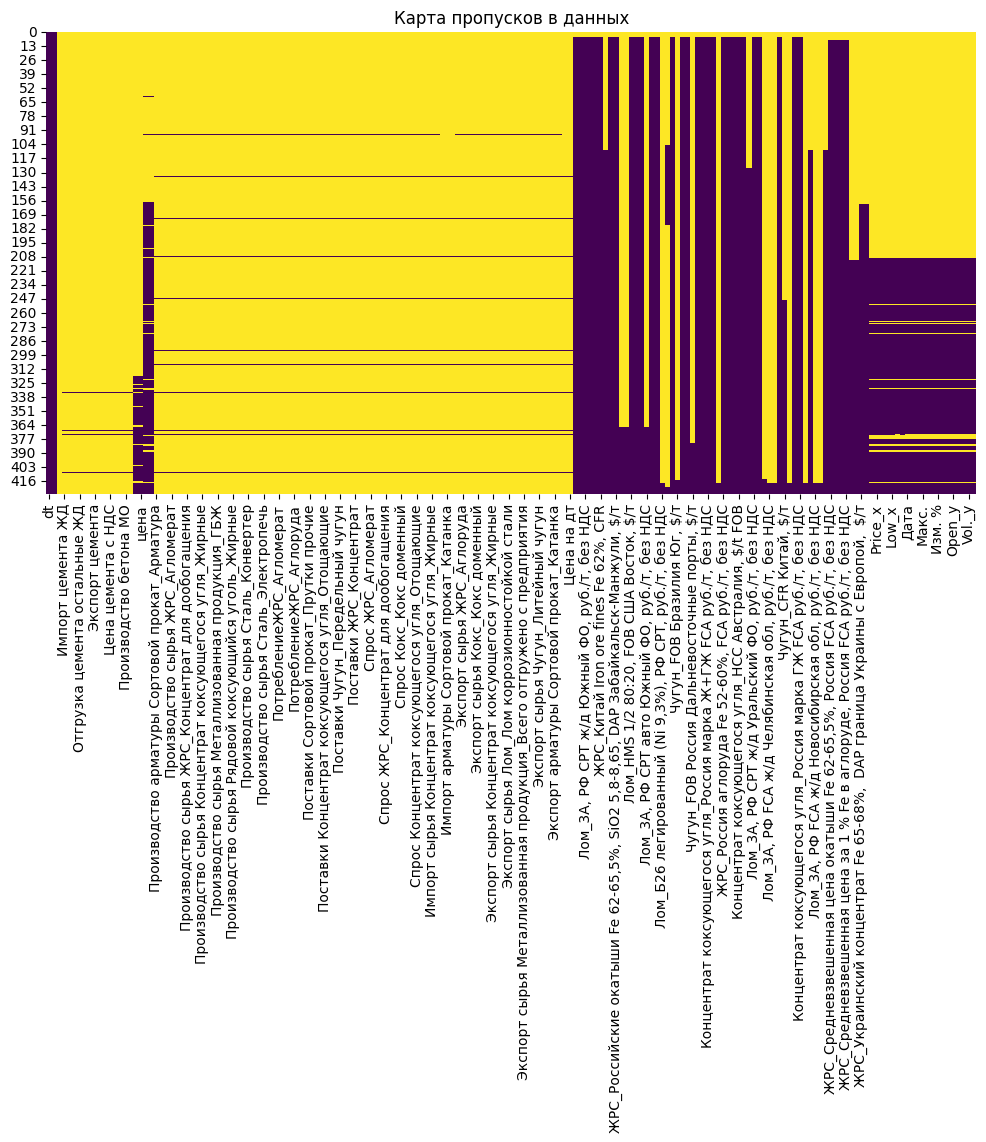

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка объединенного файла
merged_df = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл1.csv')

# 1. Анализ пропусков
print("Анализ пропусков:")
missing_data = merged_df.isnull().sum()  # Количество пропусков в каждой колонке
missing_percentage = (missing_data / len(merged_df)) * 100  # Процент пропусков

# Создаем DataFrame для отображения пропусков
missing_df = pd.DataFrame({
    "Колонка": missing_data.index,
    "Количество пропусков": missing_data.values,
    "Процент пропусков": missing_percentage.values
})
print(missing_df)

# 2. Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title("Карта пропусков в данных")
plt.show()

In [124]:
import pandas as pd

# Загрузка объединенного файла
merged_df = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл1.csv')

# 1. Анализ пропусков
print("Анализ пропусков до удаления:")
missing_data = merged_df.isnull().sum()  # Количество пропусков в каждой колонке
missing_percentage = (missing_data / len(merged_df)) * 100  # Процент пропусков

# Создаем DataFrame для отображения пропусков
missing_df = pd.DataFrame({
    "Колонка": missing_data.index,
    "Количество пропусков": missing_data.values,
    "Процент пропусков": missing_percentage.values
})
print(missing_df)

# 2. Удаление колонок с пропусками > 50%
columns_to_drop = missing_df[missing_df["Процент пропусков"] > 50]["Колонка"].tolist()  # Колонки для удаления
merged_df = merged_df.drop(columns=columns_to_drop)  # Удаление колонок

# 3. Анализ пропусков после удаления
print("\nАнализ пропусков после удаления:")
missing_data_after = merged_df.isnull().sum()
missing_percentage_after = (missing_data_after / len(merged_df)) * 100

missing_df_after = pd.DataFrame({
    "Колонка": missing_data_after.index,
    "Количество пропусков": missing_data_after.values,
    "Процент пропусков": missing_percentage_after.values
})
print(missing_df_after)

# 4. Сохранение результата в новый CSV-файл
merged_df.to_csv(r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл_без_пропусков.csv', index=False, encoding='utf-8-sig')
print("\nКолонки с пропусками > 50% удалены. Результат сохранен в 'Объединенный_файл_без_пропусков.csv'.")

Анализ пропусков до удаления:
                             Колонка  Количество пропусков  Процент пропусков
0                                 dt                     0           0.000000
1                   Цена на арматуру                     0           0.000000
2    Индекс стоимости грузоперевозок                   428         100.000000
3                  Импорт цемента ЖД                   424          99.065421
4                 Экспорт цемента ЖД                   424          99.065421
..                               ...                   ...                ...
177                           Open_y                   224          52.336449
178                           High_y                   224          52.336449
179                            Low_y                   224          52.336449
180                           Vol._y                   224          52.336449
181                       Change %_y                   224          52.336449

[182 rows x 3 columns]

Анализ пр

                                               Column  Missing Values  \
2                                     Ключевая ставка             171   
3                                        Курс доллара             171   
4   Концентрат коксующегося угля_Россия марка ОС F...               5   
5            Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т               5   
6        Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС               5   
7    Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС               5   
8   Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без...               5   
9                ЖРС_Китай Iron ore fines Fe 62%, CFR               5   
10                              Чугун_CFR Италия, $/т             110   
11  Концентрат коксующегося угля_Россия марка КО F...               5   
12  ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8...               5   
13             Лом_HMS 1/2 80:20, FOB США Восток, $/т               5   
14                    Лом_3А, FOB РФ Черное море, $

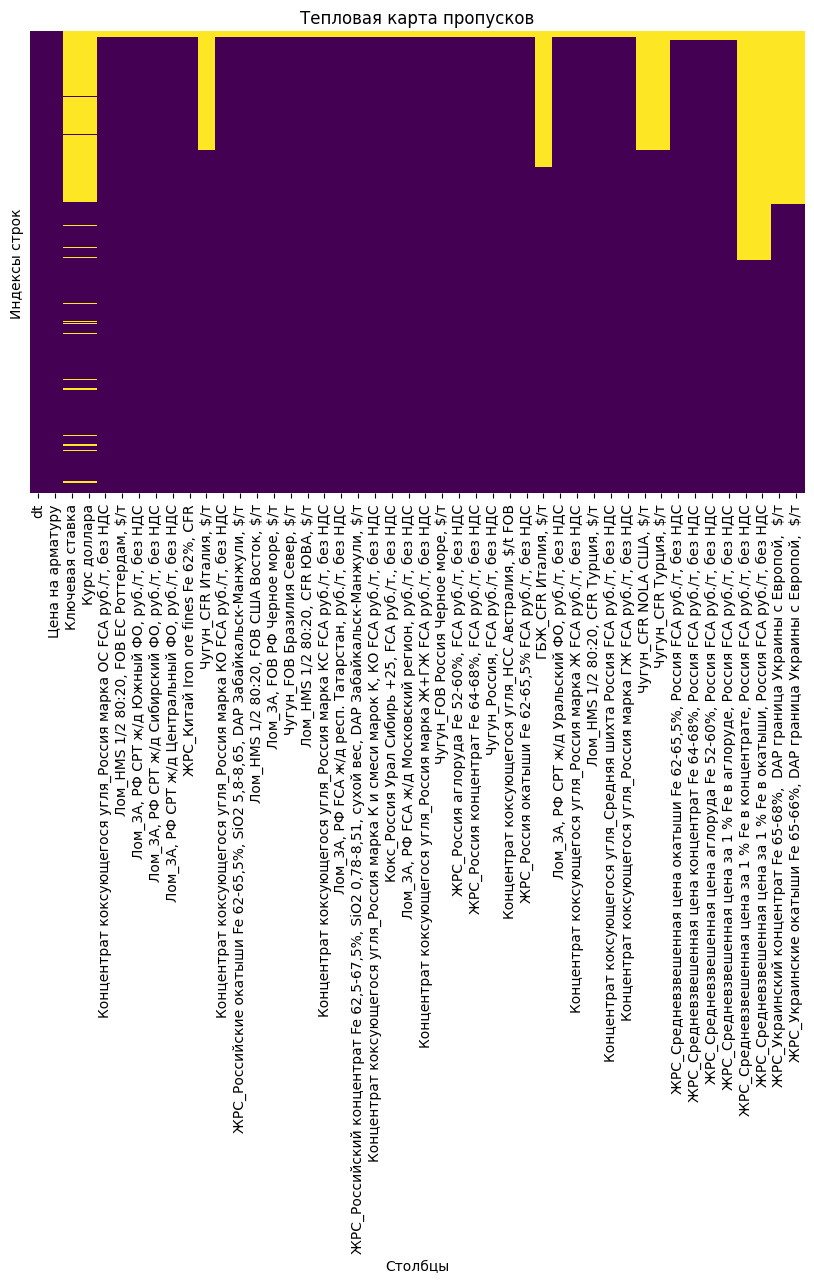

Таблица с пропусками сохранена.


In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
file_path = r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл_без_пропусков.csv'
data = pd.read_csv(file_path)

# Проверка на пропуски
missing_data = data.isnull().sum()

# Создание таблицы с информацией о пропусках
missing_table = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage': (missing_data.values / len(data)) * 100
})

# Фильтрация только тех столбцов, где есть пропуски
missing_table = missing_table[missing_table['Missing Values'] > 0]

# Вывод таблицы
print(missing_table)

# Создание тепловой карты пропусков
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Тепловая карта пропусков')
plt.xlabel('Столбцы')
plt.ylabel('Индексы строк')
plt.show()

# Сохранение таблицы с пропусками в новый CSV файл (по желанию)
missing_table.to_csv(r'C:\Users\user\Desktop\Интенсив.py\Таблица_пропусков.csv', index=False)

print("Таблица с пропусками сохранена.")

In [2]:
import pandas as pd

# Чтение файла с преобразованием даты
df = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл_стационарный.csv', parse_dates=['dt'])

# Форматирование даты в строку с добавлением времени
df['dt'] = df['dt'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Перезапись исходного файла
df.to_csv(r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл_стационарный.csv', index=False, encoding='utf-8-sig')

In [128]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def advanced_fillna(series):
    notna = series.notna()
    
    if notna.sum() < 2:
        return series.ffill().bfill()
    
    # Используем порядковый номер точки как признак
    X = np.arange(len(series))[notna].reshape(-1, 1)
    y = series[notna].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    X_all = np.arange(len(series)).reshape(-1, 1)
    predicted = model.predict(X_all)
    
    return pd.Series(np.where(notna, series, predicted), index=series.index)

# Загрузка данных с установкой даты в индекс
df = pd.read_csv('Объединенный_файл_без_пропусков.csv', parse_dates=['dt'])
df.set_index('dt', inplace=True)  # Устанавливаем дату как индекс

# Удаление первых 6 строк
df = df.iloc[6:]

# Заполнение пропусков для каждой числовой колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    # Сортировка по индексу (дате)
    sorted_series = df[col].sort_index()
    
    # Применяем заполнение
    filled_series = advanced_fillna(sorted_series)
    
    # Возвращаем данные в исходный DataFrame
    df[col] = filled_series

# Дополнительная интерполяция по времени (теперь индекс DatetimeIndex)
df[numeric_cols] = df[numeric_cols].interpolate(method='time').ffill().bfill()

# Сброс индекса для сохранения колонки 'dt'
df.reset_index(inplace=True)

# Сохранение изменений
df.to_csv('Объединенный_файл_без_пропусков.csv', index=False, encoding='utf-8-sig')

Empty DataFrame
Columns: [Column, Missing Values, Percentage]
Index: []


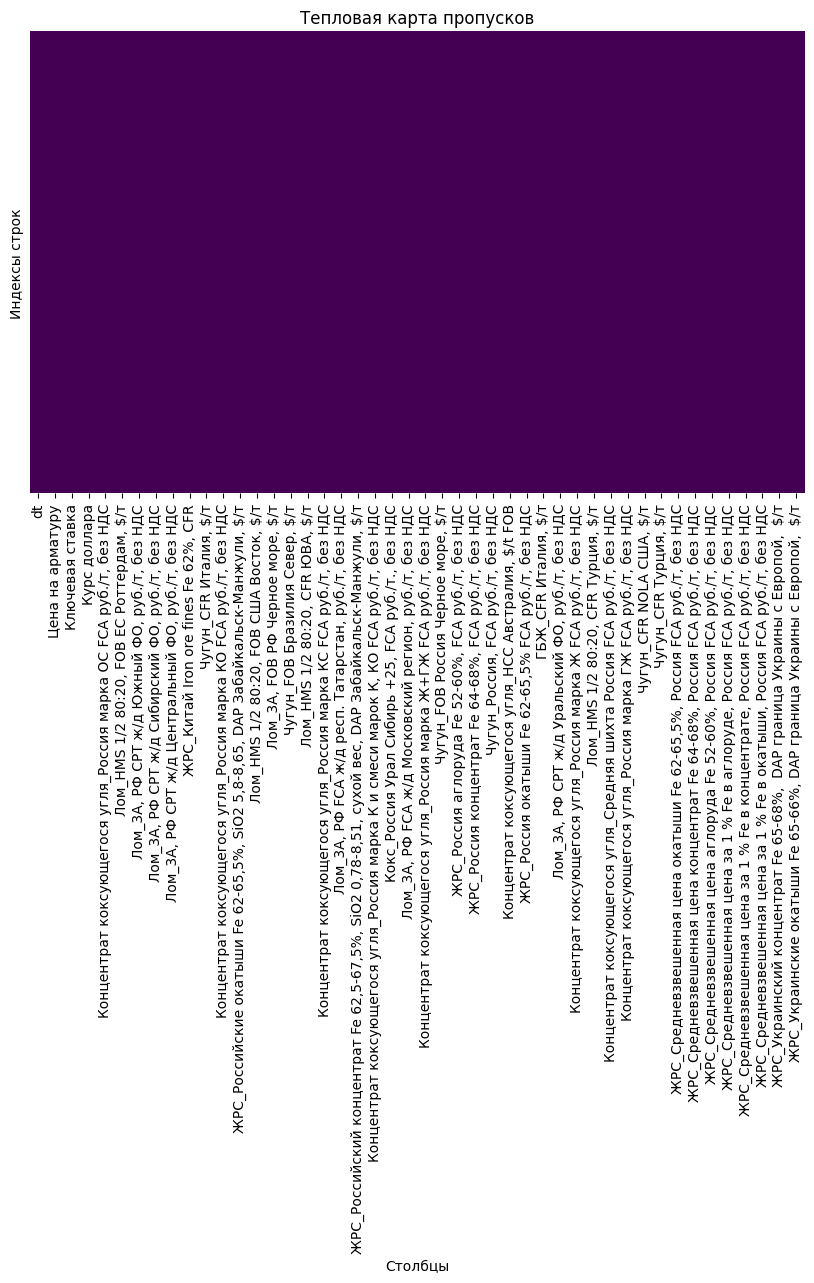

Таблица с пропусками сохранена.


In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
file_path = r'C:\Users\user\Desktop\Интенсив.py\Объединенный_файл_без_пропусков.csv'
data = pd.read_csv(file_path)

# Проверка на пропуски
missing_data = data.isnull().sum()

# Создание таблицы с информацией о пропусках
missing_table = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage': (missing_data.values / len(data)) * 100
})

# Фильтрация только тех столбцов, где есть пропуски
missing_table = missing_table[missing_table['Missing Values'] > 0]

# Вывод таблицы
print(missing_table)

# Создание тепловой карты пропусков
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Тепловая карта пропусков')
plt.xlabel('Столбцы')
plt.ylabel('Индексы строк')
plt.show()

# Сохранение таблицы с пропусками в новый CSV файл (по желанию)
missing_table.to_csv(r'C:\Users\user\Desktop\Интенсив.py\Таблица_пропусков.csv', index=False)

print("Таблица с пропусками сохранена.")

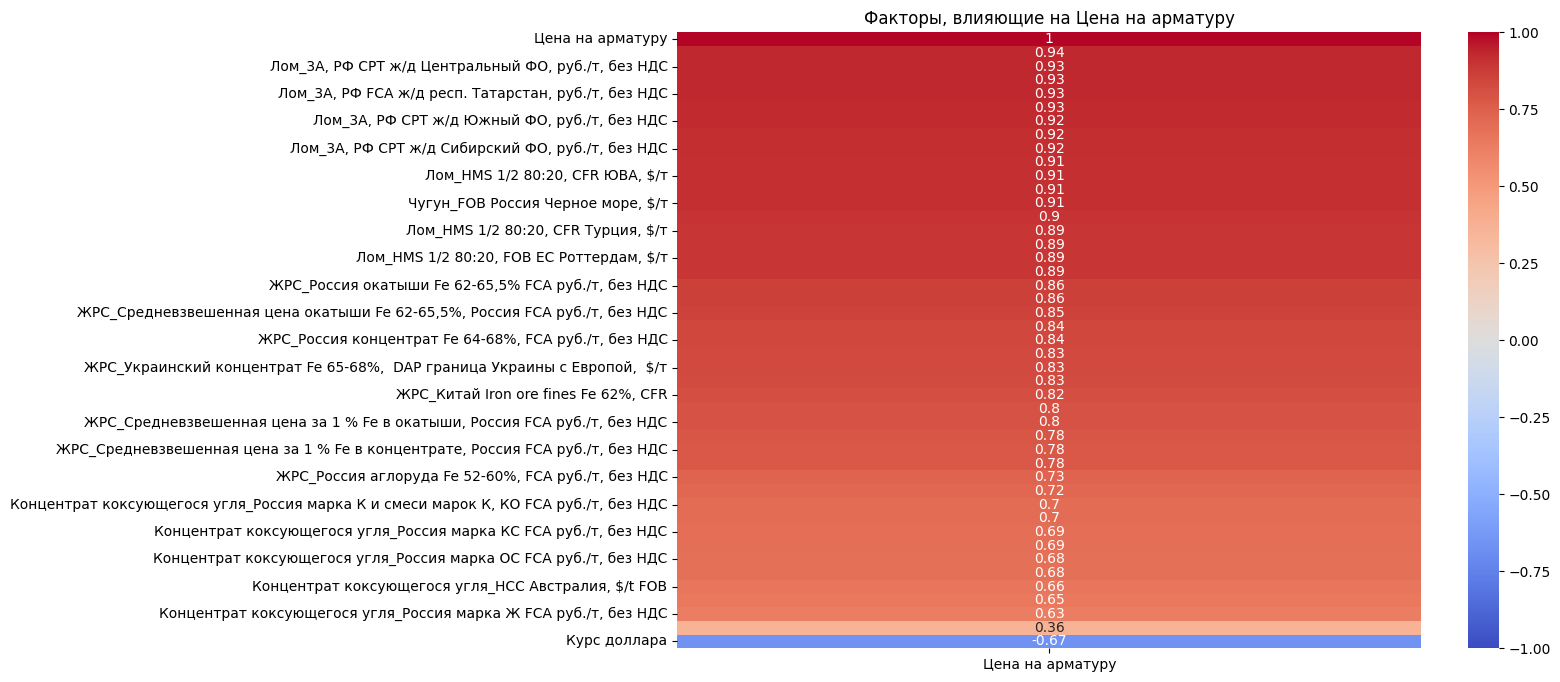

Топ влияющих факторов:
Цена на арматуру                                                                                    1.000000
Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС                                               0.936416
Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС                                                  0.933671
Чугун_CFR Турция, $/т                                                                               0.931301
Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС                                                 0.929765
Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС                                                    0.927830
Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                        0.922446
Чугун_Россия, FCA руб./т, без НДС                                                                   0.919625
Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС                                                    0.917

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('Объединенный_файл_без_пропусков.csv')

# Выделение числовых колонок (исключаем дату)
numeric_cols = df.select_dtypes(include=['number']).columns

# Расчет корреляционной матрицы
correlation_matrix = df[numeric_cols].corr(method='pearson')  # Можно использовать 'spearman' для нелинейных связей

# Выбор корреляций с ценой арматуры (предполагая, что это второй столбец)
target_column = df.columns[1]
price_correlations = correlation_matrix[target_column].sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Факторы, влияющие на {target_column}')
plt.show()

# Вывод таблицы корреляций
print("Топ влияющих факторов:")
print(price_correlations.to_string())

In [131]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('Объединенный_файл_без_пропусков.csv')

# Проверка наличия 4-й колонки
if len(df.columns) > 3:
    # Получаем имя 4-й колонки
    column_to_drop = df.columns[3]
    
    # Удаляем колонку
    df = df.drop(columns=column_to_drop)
    
    # Сохраняем изменения
    df.to_csv('Объединенный_файл_без_пропусков.csv', index=False, encoding='utf-8-sig')
    print(f"Колонка '{column_to_drop}' успешно удалена")
else:
    print("Ошибка: В файле меньше 4 колонок")

Колонка 'Курс доллара' успешно удалена


In [17]:
import pandas as pd

# Чтение файла с преобразованием даты
df = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\train_6_processed.csv', parse_dates=['dt'])

# Форматирование даты в строку с добавлением времени
df['dt'] = df['dt'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Перезапись исходного файла
df.to_csv('Объединенный_файл_без_пропусков.csv', index=False, encoding='utf-8-sig')

Моделька

In [160]:
# 1. Импорт библиотек
import pandas as pd
import lightgbm as lgb
import joblib
import re

# 2. Загрузка данных
data_path = "C:\\Users\\user\\Desktop\\Интенсив.py\\Объединенный_файл_без_пропусков.csv"
df = pd.read_csv(data_path, parse_dates=['dt'])
df = df.sort_values('dt').set_index('dt')

# 3. Функция для очистки названий признаков (сохраняем кириллицу)
def clean_feature_names(df):
    """Удаляет спецсимволы, но сохраняет кириллические символы"""
    df.columns = [
        re.sub(r'[^\wа-яА-ЯёЁ_]', '', col)  # Разрешаем буквы, цифры, _ и кириллицу
        .replace(' ', '_')
        .strip('_')  # Удаляем подчеркивания по краям
        for col in df.columns
    ]
    return df

# 4. Очищаем названия и находим целевую переменную
df = clean_feature_names(df)

# Ищем целевую переменную по паттерну (настраивайте под ваши данные)
# Исправленный код для поиска целевой колонки
target_col = [col for col in df.columns if 'ценанаарматуру' in col.lower()]
if not target_col:
    raise ValueError(f"Целевая переменная не найдена. Доступные колонки: {df.columns.tolist()}")
target_col = target_col[0]

print(f"Используется целевая переменная: {target_col}")

# 5. Создание временных признаков
def create_features(df, lags=4, window_sizes=[4, 8, 12]):
    # Лаги целевой переменной
    for lag in range(1, lags+1):
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    
    # Скользящие статистики
    for window in window_sizes:
        df[f'rolling_mean_{window}'] = df[target_col].shift(1).rolling(window).mean()
        df[f'rolling_std_{window}'] = df[target_col].shift(1).rolling(window).std()
    
    # Временные признаки
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['week'] = df.index.isocalendar().week
    
    return df.dropna()

# 6. Обработка данных
df_processed = create_features(df.copy())

# 7. Подготовка данных для обучения
features = [col for col in df_processed.columns if col != target_col]
X = df_processed[features]
y = df_processed[target_col]

# 8. Параметры модели
model_params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'max_depth': -1,
    'n_estimators': 200,
    'feature_fraction': 0.8,
    'verbose': -1
}

# 9. Обучение модели
final_model = lgb.LGBMRegressor(**model_params)
final_model.fit(X, y)

# 10. Сохранение модели
joblib.dump({
    'model': final_model,
    'features': features,
    'target_col': target_col,
    'feature_processor': create_features
}, 'armature_price_production_model.pkl')

Используется целевая переменная: Ценанаарматуру


['armature_price_production_model.pkl']


Результаты кросс-валидации:
        R2         MSE     RMSE      MAE  MAPE   SMAPE
fold                                                  
1     0.08  1213278.94  1101.49   842.42   inf  146.49
2    -0.25  1644492.28  1282.38   812.93   inf  129.69
3    -0.79   619751.24   787.24   644.94   inf  158.16
4     0.36  4249002.90  2061.31  1496.40   inf  131.23
5     0.20  4527336.92  2127.75  1473.16   inf  131.81
mean -0.08  2450772.45  1472.03  1053.97   inf  139.48
std   0.41  1617397.25   532.81   358.22   NaN   11.14


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


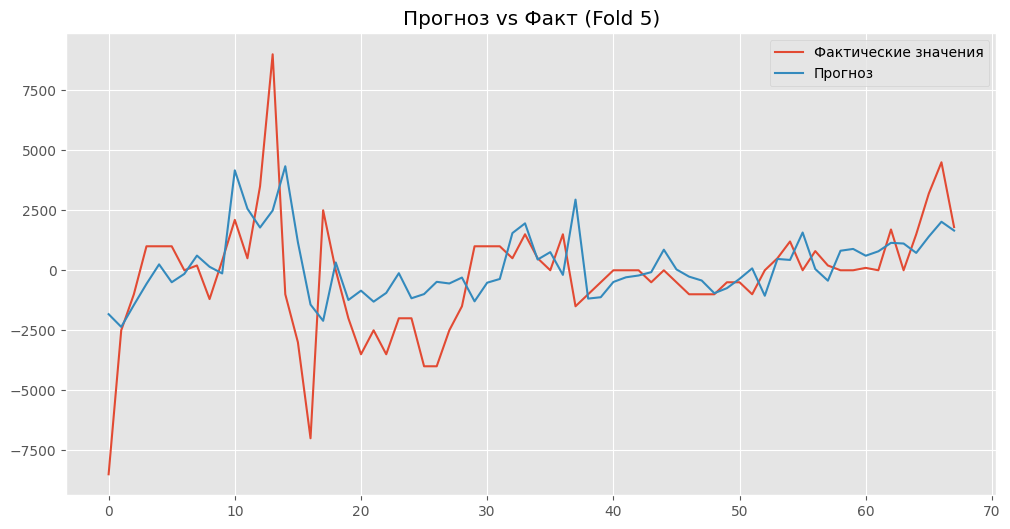

In [165]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)
from sklearn.model_selection import TimeSeriesSplit

# Кастомные метрики
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Временная кросс-валидация (Time Series Split)
tscv = TimeSeriesSplit(n_splits=5)
metrics = []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    # Разделение данных
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Обучение модели
    final_model.fit(X_train, y_train)
    
    # Прогнозирование
    y_pred = final_model.predict(X_test)
    
    # Вычисление метрик
    metrics.append({
        'fold': fold + 1,
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'SMAPE': symmetric_mape(y_test, y_pred)
    })

# Создаем DataFrame с результатами
metrics_df = pd.DataFrame(metrics).set_index('fold')

# Добавляем средние значения
metrics_df.loc['mean'] = metrics_df.mean()
metrics_df.loc['std'] = metrics_df.std()

print("\nРезультаты кросс-валидации:")
print(metrics_df.round(2))

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Фактические значения')
plt.plot(y_pred, label='Прогноз')
plt.title(f'Прогноз vs Факт (Fold {fold+1})')
plt.legend()
plt.show()

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm  # Для прогресс-бара

# 1. Загрузка данных
data_path = "C:\\Users\\user\\Desktop\Интенсив.py\\Объединенный_файл_без_пропусков.csv"
df = pd.read_csv(data_path, parse_dates=['dt'])
df = df.sort_values('dt').set_index('dt')

# 2. Отберем только числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Проверяемые колонки: {numeric_cols}")

# 3. Функция для проверки стационарности
def check_stationarity(series, alpha=0.05, plot=True):
    """Проверяет стационарность ряда с помощью ADF теста и визуализации"""
    # ADF тест
    result = adfuller(series.dropna())
    p_value = result[1]
    is_stationary = p_value < alpha
    
    # Визуализация
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(series, label='Исходный ряд')
        plt.plot(series.rolling(12).mean(), label='Скользящее среднее')
        plt.plot(series.rolling(12).std(), label='Скользящее СКО')
        plt.title(f"{series.name}\nADF p-value: {p_value:.4f} | Стационарность: {is_stationary}")
        plt.legend()
        plt.show()
    
    return {
        'adf_statistic': result[0],
        'p_value': p_value,
        'is_stationary': is_stationary,
        'critical_values': result[4]
    }

# 4. Проверяем все числовые колонки
results = []
for col in tqdm(numeric_cols, desc="Проверка стационарности"):
    try:
        res = check_stationarity(df[col], plot=False)  # Установите plot=True для графиков
        results.append({
            'Колонка': col,
            'ADF Статистика': res['adf_statistic'],
            'p-value': res['p_value'],
            'Стационарность': res['is_stationary'],
            'Критические значения (1%)': res['critical_values']['1%'],
            'Критические значения (5%)': res['critical_values']['5%'],
            'Критические значения (10%)': res['critical_values']['10%']
        })
    except Exception as e:
        print(f"Ошибка в колонке {col}: {str(e)}")

# 5. Результаты в таблицу
results_df = pd.DataFrame(results).set_index('Колонка')
print("\nРезультаты тестов на стационарность:")
print(results_df.sort_values('Стационарность'))

# 6. Статистика по стационарности
stationary_cnt = results_df['Стационарность'].sum()
print(f"\nСтационарных колонок: {stationary_cnt}/{len(numeric_cols)} ({stationary_cnt/len(numeric_cols):.1%})")

Проверяемые колонки: ['Цена на арматуру', 'Ключевая ставка', 'Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС', 'Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т', 'Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС', 'Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС', 'Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС', 'ЖРС_Китай Iron ore fines Fe 62%, CFR', 'Чугун_CFR Италия, $/т', 'Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС', 'ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т', 'Лом_HMS 1/2 80:20, FOB США Восток, $/т', 'Лом_3А, FOB РФ Черное море, $/т', 'Чугун_FOB Бразилия Север, $/т', 'Лом_HMS 1/2 80:20, CFR ЮВА, $/т', 'Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС', 'Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС', 'ЖРС_Российский концентрат Fe 62,5-67,5%, SiO2 0,78-8,51, сухой вес, DAP Забайкальск-Манжули, $/т', 'Концентрат коксующегося угля_Россия марка К и смеси марок К, КО FCA руб./т, без НДС', 'К

Проверка стационарности: 100%|██████████| 44/44 [00:00<00:00, 238.55it/s]


Результаты тестов на стационарность:
                                                    ADF Статистика  \
Колонка                                                              
Цена на арматуру                                         -7.728571   
ЖРС_Россия концентрат Fe 64-68%, FCA руб./т, бе...       -6.415455   
Чугун_Россия, FCA руб./т, без НДС                        -4.272378   
Концентрат коксующегося угля_HCC Австралия, $/t...       -6.997397   
ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС       -6.345341   
ГБЖ_CFR Италия, $/т                                      -5.065072   
Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС        -10.514991   
Концентрат коксующегося угля_Россия марка Ж FCA...       -7.627628   
Лом_HMS 1/2 80:20, CFR Турция, $/т                       -5.826658   
ЖРС_Россия аглоруда Fe 52-60%, FCA руб./т, без НДС      -12.582853   
Концентрат коксующегося угля_Средняя шихта Росс...       -7.238479   
Чугун_CFR NOLA США, $/т                             

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Загрузка данных из CSV файла
file_path = r'C:\Users\user\Desktop\Интенсив.py\merged.csv'
data = pd.read_csv(file_path)

# Преобразуем первую колонку в формат даты
data['dt'] = pd.to_datetime(data['dt'])

# Функция для проверки стационарности и преобразования
def make_stationary(series):
    series = series.dropna()  # Удаляем пропуски
    if not pd.api.types.is_numeric_dtype(series):
        return series, None  # Возвращаем оригинальный ряд и None, если не числовой

    # Проверяем, является ли ряд постоянным
    if series.nunique() <= 1:
        return series, None  # Пропускаем постоянные ряды

    result = adfuller(series)
    if result[1] > 0.05:  # p-value > 0.05 означает, что ряд не стационарен
        series = series.diff().dropna()  # Применяем разности
        result = adfuller(series)  # Проверяем снова
    return series, result[1]  # Возвращаем ряд и p-value

# Применяем функцию ко всем колонкам, кроме первой
stationary_counts = 0
total_counts = data.shape[1] - 1  # Учитываем только колонки с данными

for column in data.columns[1:]:  # Пропускаем первую колонку с датами
    data[column], p_value = make_stationary(data[column])
    if p_value is not None and p_value <= 0.05:
        stationary_counts += 1

# Сохранение обновленного DataFrame в тот же CSV файл
data.to_csv(file_path, index=False)

# Вывод информации о стационарных рядах
print(f"Стационарных рядов стало: {stationary_counts}, было: {total_counts}")

Стационарных рядов стало: 67, было: 69


C:\Users\user\AppData\Local\Temp\ipykernel_17028\1057400278.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=100, freq='M')


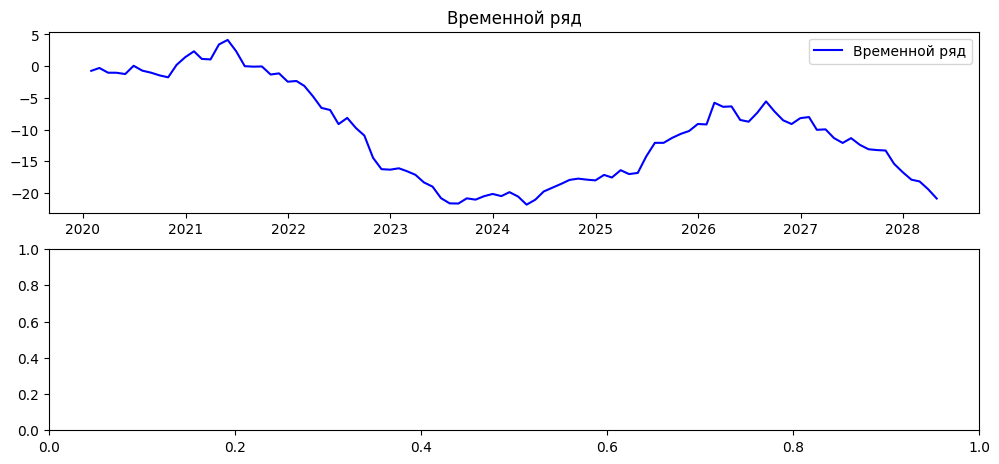

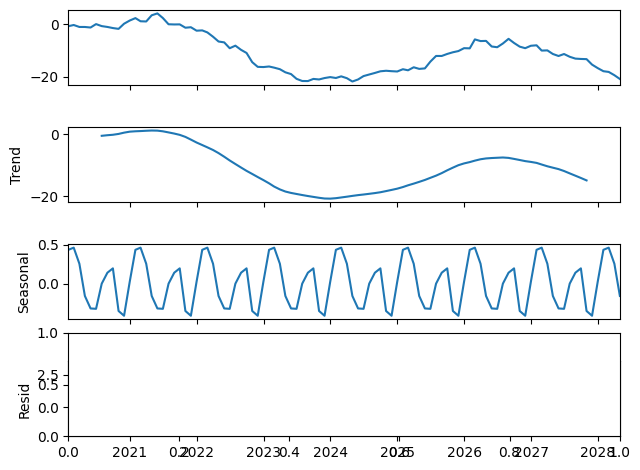

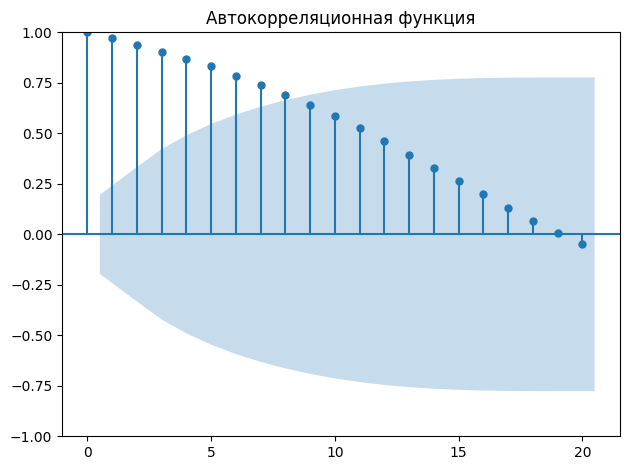

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Пример данных временного ряда
# Замените этот код на загрузку ваших данных
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
data = np.random.randn(100).cumsum() + 10 * np.sin(np.linspace(0, 3 * np.pi, 100))
time_series = pd.Series(data, index=dates)

# Визуализация временного ряда
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(time_series, label='Временной ряд', color='blue')
plt.title('Временной ряд')
plt.legend()

# Визуализация сезонности
plt.subplot(312)
sm.tsa.seasonal_decompose(time_series, model='additive').plot()
plt.title('Декомпозиция временного ряда')
plt.tight_layout()

# Визуализация автокорреляции
plt.subplot(313)
sm.graphics.tsa.plot_acf(time_series, lags=20)
plt.title('Автокорреляционная функция')
plt.tight_layout()

plt.show()

В данных найдены пропуски. Заполнение пропусков средним значением.


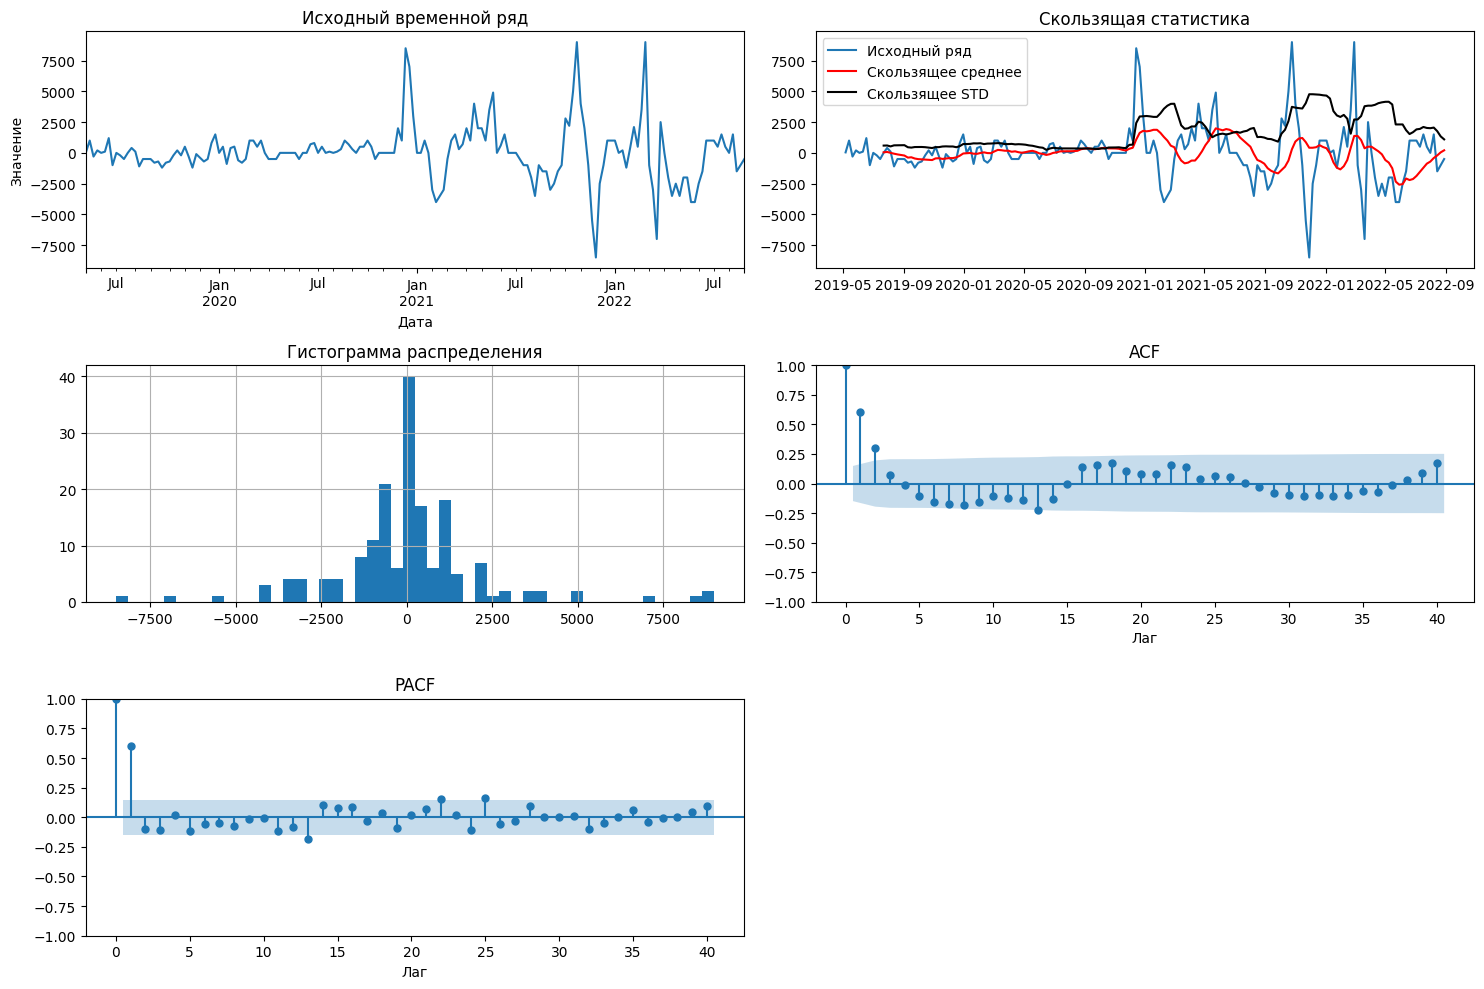

Результаты теста Дики-Фуллера:
Test Statistic                -6.517665e+00
p-value                        1.061341e-08
#Lags Used                     0.000000e+00
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
file_path = r"C:\Users\user\Desktop\Интенсив.py\merged.csv"
df = pd.read_csv(file_path, parse_dates=['dt'], index_col='dt')

# Проверка на пропуски и их обработка
if df.isnull().values.any():
    print("В данных найдены пропуски. Заполнение пропусков средним значением.")
    df.fillna(df.mean(), inplace=True)  # Заполнение пропусков средним значением

# Функция для теста Дики-Фуллера
def adf_test(timeseries):
    print('Результаты теста Дики-Фуллера:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic',
        'p-value',
        '#Lags Used',
        'Number of Observations Used'
    ])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Визуализация стационарности
plt.figure(figsize=(15, 10))

# 1. Исходный временной ряд
plt.subplot(3, 2, 1)
df.iloc[:, 0].plot(title='Исходный временной ряд')
plt.xlabel('Дата')
plt.ylabel('Значение')

# 2. Скользящее среднее и стандартное отклонение
plt.subplot(3, 2, 2)
rolling_mean = df.iloc[:, 0].rolling(window=12).mean()
rolling_std = df.iloc[:, 0].rolling(window=12).std()
plt.plot(df.iloc[:, 0], label='Исходный ряд')
plt.plot(rolling_mean, label='Скользящее среднее', color='red')
plt.plot(rolling_std, label='Скользящее STD', color='black')
plt.title('Скользящая статистика')
plt.legend()

# 3. Гистограмма распределения
plt.subplot(3, 2, 3)
df.iloc[:, 0].hist(bins=50)
plt.title('Гистограмма распределения')

# 4. ACF (Автокорреляционная функция)
plt.subplot(3, 2, 4)
plot_acf(df.iloc[:, 0], lags=40, ax=plt.gca(), title='ACF')
plt.xlabel('Лаг')

# 5. PACF (Частная автокорреляционная функция)
plt.subplot(3, 2, 5)
plot_pacf(df.iloc[:, 0], lags=40, ax=plt.gca(), title='PACF')
plt.xlabel('Лаг')

plt.tight_layout()
plt.show()

# Тест Дики-Фуллера для проверки стационарности
adf_test(df.iloc[:, 0])

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Загрузка данных
file_path = r'C:\Users\user\Desktop\Интенсив.py\merged.csv'
df = pd.read_csv(file_path, parse_dates=['dt'], index_col='dt')

# Удаление строк с пропусками
df_clean = df.dropna()

# Проверка, что данные не пусты
if df_clean.empty:
    raise ValueError("Данные после удаления пропусков пусты. Проверьте исходный файл.")

# Выделение целевой переменной и признаков
target = 'Цена на арматуру'
if target not in df_clean.columns:
    raise KeyError(f"Целевая переменная '{target}' отсутствует в данных.")

X = df_clean.drop(columns=[target])
y = df_clean[target]

# 1. Корреляционный анализ (на очищенных данных)
correlation = df_clean.corr()[target].drop(target)

# 2. Регрессионный анализ
model = LinearRegression()
model.fit(X, y)

# 3. Расчет важности признаков
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Вес в регрессии': model.coef_,
    'Абс.Вес': np.abs(model.coef_)
})

# 4. Расчет VIF
vif = pd.DataFrame()
vif["Признак"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Сбор итоговой таблицы
result_df = pd.DataFrame({
    'Признак': X.columns,
    'Корреляция': correlation.values,
    'Вес в регрессии': model.coef_,
    'VIF': vif['VIF']
}).sort_values(by='Корреляция', key=lambda x: np.abs(x), ascending=False)

# Форматирование вывода
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("\nТаблица влияния признаков на цену арматуры:")
print(result_df.to_string(index=False))
print("\nПримечание: VIF > 5 указывает на возможную мультиколлинеарность.")


Таблица влияния признаков на цену арматуры:
                                                                                         Признак  Корреляция  Вес в регрессии           VIF
                                                                                       Цена_lag1      0.9883           0.0000    44683.3195
                                                                            Скользящее_среднее_4      0.9813           0.5000           inf
                                                                                       Цена_lag2      0.9626          -0.0000    16334.2168
                                                                           Чугун_CFR Турция, $/т      0.9424          -0.0000     5797.5708
                                                                            Скользящее_среднее_8      0.9389           0.5000           inf
                                                                 Лом_HMS 1/2 80:20, CFR ЮВА, $/т      0.9239       

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [32]:
import pandas as pd

# Загрузка данных из CSV файла
data = pd.read_csv(r'C:\Users\user\Desktop\Интенсив.py\merged.csv')

# Удаление 8-й и 5-й колонок (индексы 7 и 4)
data = data.drop(data.columns[[7, 4]], axis=1)

# Сохранение обновленного файла
data.to_csv(r'C:\Users\user\Desktop\Интенсив.py\merged.csv', index=False)

In [12]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# ======================================
# 0. Настройки
# ======================================
TARGET = 'Цена на арматуру'  # Укажите название целевой переменной
VIF_THRESHOLD = 5         # Максимально допустимый VIF
CORR_THRESHOLD = 0.3      # Минимальная абсолютная корреляция с целевой

# ======================================
# 1. Загрузка данных
# ======================================
def load_data(path):
    df = pd.read_csv(
        path, 
        parse_dates=['dt'], 
        encoding='utf-8-sig'
    )
    print(f"Загружено строк: {len(df)}, признаков: {len(df.columns)}")
    return df

# ======================================
# 2. Предобработка
# ======================================
def preprocess_data(df):
    # Сохраняем дату отдельно
    dates = df['dt'].copy()
    
    # Удаляем дату из числовых данных
    df_numeric = df.drop('dt', axis=1)
    
    # Обработка пропусков (замена на медиану)
    df_numeric = df_numeric.fillna(df_numeric.median())
    
    return df_numeric, dates

# ======================================
# 3. Фильтрация признаков
# ======================================
def filter_features(df, target):
    # Удаляем низкокоррелированные признаки
    corr_matrix = df.corr()[target].abs()
    relevant_features = corr_matrix[corr_matrix >= CORR_THRESHOLD].index.tolist()
    
    if target not in relevant_features:
        relevant_features.append(target)
    
    return df[relevant_features]

# ======================================
# 4. Удаление мультиколлинеарности (VIF)
# ======================================
def reduce_vif(df, target, threshold):
    features = df.drop(target, axis=1).columns.tolist()
    i = 0
    
    while True:
        if i >= len(features):
            break
            
        vif = pd.DataFrame()
        vif["feature"] = features
        vif["VIF"] = [variance_inflation_factor(df[features].values, i) 
                      for i in range(len(features))]
        
        max_vif = vif['VIF'].max()
        if max_vif <= threshold:
            break
            
        remove_feature = vif.loc[vif['VIF'] == max_vif, 'feature'].values[0]
        features.remove(remove_feature)
        print(f"Удален {remove_feature} (VIF={max_vif:.1f})")
        i += 1
    
    return df[features + [target]]

# ======================================
# 5. Отбор признаков через Lasso
# ======================================
def lasso_selection(df, target):
    X = df.drop(target, axis=1)
    y = df[target]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    model = LassoCV(cv=5, max_iter=10000)
    model.fit(X_scaled, y)
    
    selected = X.columns[model.coef_ != 0].tolist()
    print(f"Lasso отобрал {len(selected)} признаков из {X.shape[1]}")
    
    return df[selected + [target]]

# ======================================
# 6. Основной пайплайн
# ======================================
def main():
    # Загрузка
    raw_df = load_data(r'C:\Users\user\Desktop\Интенсив.py\train_6.csv')
    
    # Предобработка
    df_numeric, dates = preprocess_data(raw_df)
    
    # Фильтрация
    df_filtered = filter_features(df_numeric, TARGET)
    print(f"После корреляционной фильтрации: {df_filtered.shape[1]} признаков")
    
    # Удаление мультиколлинеарности
    df_low_vif = reduce_vif(df_filtered, TARGET, VIF_THRESHOLD)
    print(f"После VIF-фильтрации: {df_low_vif.shape[1]} признаков")
    
    # Отбор через Lasso
    df_final = lasso_selection(df_low_vif, TARGET)
    
    # Масштабирование
    scaler = StandardScaler()
    features = df_final.drop(TARGET, axis=1).columns
    df_final[features] = scaler.fit_transform(df_final[features])
    
    # Возвращаем дату
    df_final['dt'] = dates
    
    # Сохранение
    output_path = r'C:\Users\user\Desktop\Интенсив.py\train_6.csv'
    df_final.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"Файл сохранен: {output_path}")
    print("Итоговые признаки:", df_final.columns.tolist())

if __name__ == "__main__":
    main()

Загружено строк: 320, признаков: 39
После корреляционной фильтрации: 36 признаков
Удален Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС (VIF=28339.3)
Удален Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС (VIF=12683.6)
Удален Лом_HMS 1/2 80:20, CFR Турция, $/т (VIF=8351.4)
Удален Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т (VIF=5019.6)
Удален Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без НДС (VIF=4828.0)
Удален Лом_3А, РФ CPT ж/д Уральский ФО, руб./т, без НДС (VIF=2763.0)
Удален Концентрат коксующегося угля_Россия марка К и смеси марок К, КО FCA руб./т, без НДС (VIF=2326.0)
Удален Лом_3А, РФ FCA ж/д Московский регион, руб./т, без НДС (VIF=2191.2)
Удален Концентрат коксующегося угля_Россия марка Ж+ГЖ FCA руб./т, без НДС (VIF=1524.6)
Удален Лом_HMS 1/2 80:20, FOB США Восток, $/т (VIF=1508.2)
Удален Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС (VIF=1087.8)
Удален Чугун_FOB Россия Черное море, $/т (VIF=1005.6)
Удален Лом_HMS 1/2 80:20, CFR ЮВА, 

C:\Users\user\AppData\Local\Temp\ipykernel_2052\107539154.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[features] = scaler.fit_transform(df_final[features])
C:\Users\user\AppData\Local\Temp\ipykernel_2052\107539154.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['dt'] = dates


In [18]:
import pandas as pd

# Загрузка данных
file_path = r'C:\Users\user\Desktop\Интенсив.py\train_6.csv'
df = pd.read_csv(file_path, parse_dates=['dt'], encoding='utf-8-sig')

# Переупорядочиваем колонки
new_columns_order = ['dt', 'Цена на арматуру'] + \
                   [col for col in df.columns if col not in ['dt', 'Цена на арматуру']]
df = df[new_columns_order]

# Сохранение результата
output_path = r'C:\Users\user\Desktop\Интенсив.py\train_6_processed.csv'
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print("Данные успешно преобразованы. Новый порядок колонок:")
print(df.columns.tolist())

Данные успешно преобразованы. Новый порядок колонок:
['dt', 'Цена на арматуру', 'Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС', 'Чугун_Россия, FCA руб./т, без НДС', 'Концентрат коксующегося угля_HCC Австралия, $/t FOB', 'ЖРС_Россия окатыши Fe 62-65,5% FCA руб./т, без НДС']


In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Цена на арматуру'])
print(f'p-value: {result[1]}')  # p-value < 0.05 → стационарность

p-value: 0.1414301445812955


Метрики качества модели:
R2: 0.82
MSE: 1313178.27
MAE: 600.80
MAPE: inf
SMAPE: 48.46


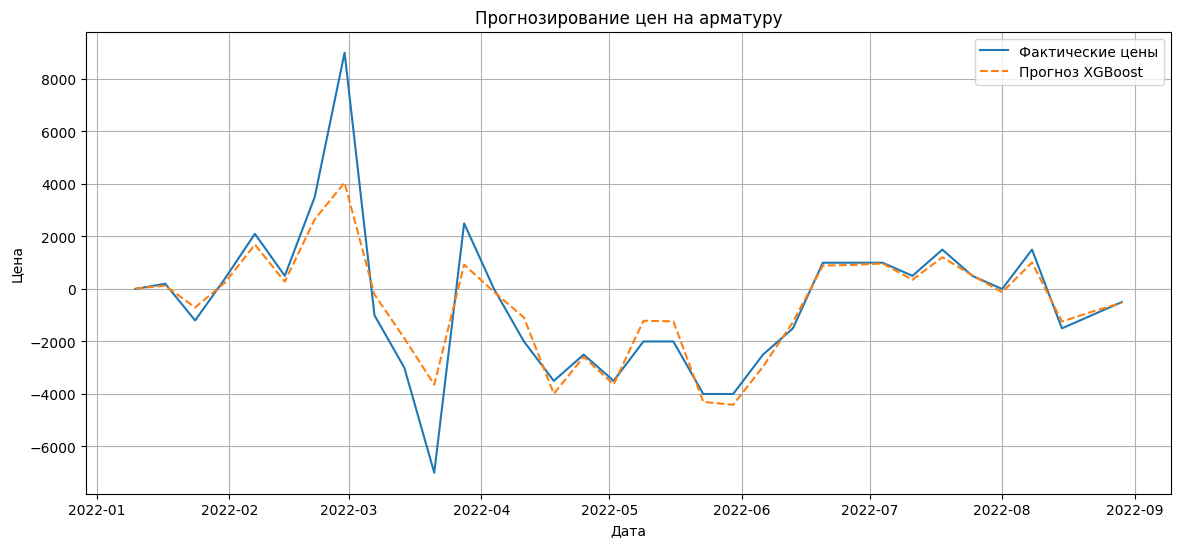

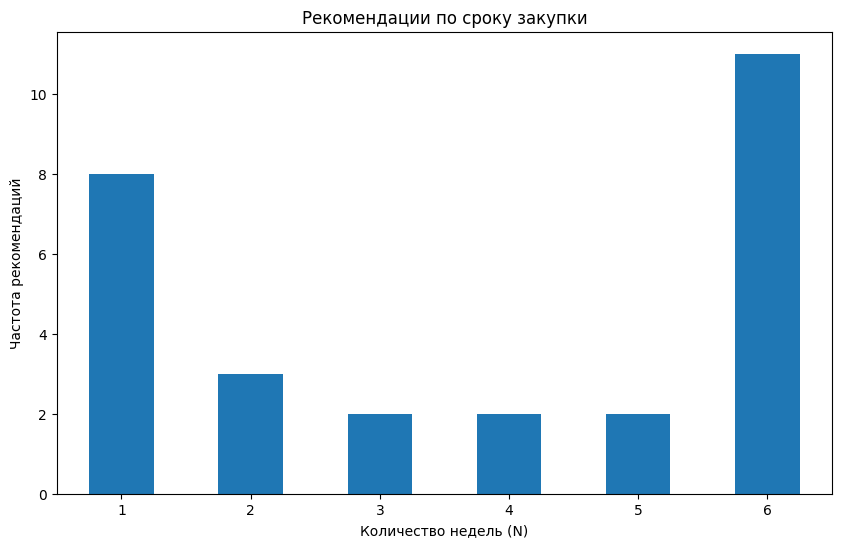

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Загрузка данных
df = pd.read_csv('C:/Users/user/Desktop/Интенсив.py/merged.csv', parse_dates=['dt'])
df = df.rename(columns={'Цена на арматуру': 'price'})

# Проверка наличия необходимых колонок
assert 'price' in df.columns, "Колонка с ценой не найдена"
assert 'dt' in df.columns, "Колонка с датой не найдена"

# Создание временных признаков
def create_features(df):
    df = df.copy()
    df['year'] = df['dt'].dt.year
    df['month'] = df['dt'].dt.month
    df['week_of_year'] = df['dt'].dt.isocalendar().week
    
    for lag in range(1, 7):
        df[f'price_lag_{lag}'] = df['price'].shift(lag)
    
    df['rolling_mean_4'] = df['price'].rolling(4).mean().shift(1)
    df['rolling_std_4'] = df['price'].rolling(4).std().shift(1)
    return df

df = create_features(df).dropna()

# Разделение данных
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train = train.drop(['dt', 'price'], axis=1)
y_train = train['price']
X_test = test.drop(['dt', 'price'], axis=1)
y_test = test['price']

# Обучение модели
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Сохранение модели с метаданными
model_data = {
    'model': model,
    'features': X_train.columns.tolist(),
    'metrics': {
        'R2': r2_score(y_test, model.predict(X_test)),
        'MSE': mean_squared_error(y_test, model.predict(X_test)),
        'MAE': mean_absolute_error(y_test, model.predict(X_test))
    }
}

joblib.dump(model_data, "xgboost_model.pkl")

# Прогнозирование и оценка
y_pred = model.predict(X_test)

# Метрики качества
metrics = {
    'R2': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'MAPE': np.mean(np.abs((y_test - y_pred)/y_test)*100),
    'SMAPE': 100/len(y_test)*np.sum(2*np.abs(y_pred-y_test)/(np.abs(y_test)+np.abs(y_pred)))
}

print("Метрики качества модели:")
for k, v in metrics.items():
    print(f"{k}: {v:.2f}")

# Визуализация прогнозов
plt.figure(figsize=(14,6))
plt.plot(test['dt'], y_test, label='Фактические цены')
plt.plot(test['dt'], y_pred, label='Прогноз XGBoost', linestyle='--')
plt.title('Прогнозирование цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

# Генерация рекомендаций
def calculate_optimal_N(current_price, predictions):
    savings = []
    for N in range(1,7):
        predicted_total = sum(predictions[:N])
        fixed_total = current_price * N
        savings.append(fixed_total - predicted_total)
    return np.argmax(savings) + 1

recommendations = []
for i in range(len(y_test)-6):
    window_pred = y_pred[i:i+6]
    current_price = y_test.iloc[i]
    recommendations.append(calculate_optimal_N(current_price, window_pred))

# Анализ рекомендаций
plt.figure(figsize=(10,6))
pd.Series(recommendations).value_counts().sort_index().plot(kind='bar')
plt.title('Рекомендации по сроку закупки')
plt.xlabel('Количество недель (N)')
plt.ylabel('Частота рекомендаций')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from xgboost import XGBRegressor
import joblib
import hashlib

class RebarForecastApp:
    def __init__(self, master):
        self.master = master
        master.title("AI Оптимизатор закупок арматуры v1.0")
        
        # Инициализация
        self.model = None
        self.feature_names = []
        self.hist_data = pd.DataFrame()
        
        # Загрузка данных и модели
        self.load_resources()
        
        # GUI
        self.create_widgets()
        self.setup_layout()

    def load_resources(self):
        """Загрузка модели и данных с обработкой ошибок"""
        try:
            # Загрузка модели
            model_data = joblib.load('xgboost_model.pkl')
            self.model = model_data['model']
            self.feature_names = model_data['features']
            
            # Загрузка и подготовка данных
            self.hist_data = pd.read_csv('merged.csv', parse_dates=['dt'])
            self.hist_data = self.hist_data.rename(columns={'Цена на арматуру': 'price'})
            self.hist_data = self.generate_features(self.hist_data).dropna()
            
            # Проверка совместимости
            self.validate_features()

        except Exception as e:
            messagebox.showerror("Ошибка инициализации", f"Ошибка загрузки данных: {str(e)}")
            self.master.destroy()

    def validate_features(self):
        """Проверка соответствия признаков"""
        missing = set(self.feature_names) - set(self.hist_data.columns)
        if missing:
            raise ValueError(f"Отсутствуют признаки: {missing}")
        
        extra = set(self.hist_data.columns) - set(self.feature_names + ['dt', 'price'])
        if extra:
            print(f"Предупреждение: Лишние признаки в данных: {extra}")

    def generate_features(self, df):
        """Генерация признаков идентично процессу обучения"""
        df = df.copy()
        # Временные признаки
        df['year'] = df['dt'].dt.year
        df['month'] = df['dt'].dt.month
        df['week_of_year'] = df['dt'].dt.isocalendar().week
        
        # Лаги цен
        for lag in [1, 2, 3, 4, 5, 6]:
            df[f'price_lag_{lag}'] = df['price'].shift(lag)
        
        # Скользящие окна
        df['rolling_mean_4'] = df['price'].rolling(4).mean().shift(1)
        df['rolling_std_4'] = df['price'].rolling(4).std().shift(1)
        
        return df

    def create_widgets(self):
        """Создание элементов интерфейса"""
        # Основные фреймы
        self.input_frame = ttk.Frame(self.master, padding=10)
        self.plot_frame = ttk.Frame(self.master)
        self.info_frame = ttk.Frame(self.master, padding=10)
        
        # Элементы ввода
        ttk.Label(self.input_frame, text="Текущая цена:", font=('Arial', 10)).grid(row=0, column=0)
        self.price_entry = ttk.Entry(self.input_frame, width=15, font=('Arial', 10))
        self.price_entry.grid(row=0, column=1, padx=5)
        
        self.predict_btn = ttk.Button(
            self.input_frame,
            text="Рассчитать оптимальную закупку",
            command=self.run_analysis,
            style='Primary.TButton'
        )
        self.predict_btn.grid(row=0, column=2, padx=10)
        
        # График
        self.figure = plt.Figure(figsize=(10, 5), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.canvas = FigureCanvasTkAgg(self.figure, self.plot_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        # Информационная панель
        self.recommendation_label = ttk.Label(
            self.info_frame,
            text="Введите текущую цену и нажмите кнопку для анализа",
            font=('Arial', 11, 'bold'),
            wraplength=400
        )
        self.recommendation_label.pack(pady=5)
        
        self.details_text = tk.Text(
            self.info_frame,
            height=8,
            width=60,
            font=('Arial', 9),
            state='disabled'
        )
        self.details_text.pack()

    def setup_layout(self):
        """Расположение элементов"""
        self.input_frame.pack(fill=tk.X)
        self.plot_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=5)
        self.info_frame.pack(fill=tk.BOTH, expand=False, pady=10)
        
        # Стили
        style = ttk.Style()
        style.configure('Primary.TButton', font=('Arial', 10, 'bold'), foreground='darkblue')

    def run_analysis(self):
        """Основная логика обработки"""
        try:
            current_price = self.validate_input()
            forecast_data = self.generate_forecast(current_price)
            optimal_N = self.calculate_optimal_period(current_price, forecast_data)
            self.update_interface(forecast_data, optimal_N)
        except Exception as e:
            messagebox.showerror("Ошибка анализа", str(e))

    def validate_input(self):
        """Проверка ввода пользователя"""
        price = self.price_entry.get()
        if not price.replace('.', '').isdigit():
            raise ValueError("Некорректный формат цены")
        return float(price)

    def generate_forecast(self, current_price):
        """Генерация прогноза на 6 недель"""
        temp_df = self.hist_data.copy()
        
        for week in range(6):
            # Создание новой записи
            new_date = temp_df['dt'].max() + pd.DateOffset(weeks=1)
            new_row = pd.DataFrame({
                'dt': [new_date],
                'price': [current_price if week == 0 else np.nan]
            })
            
            # Добавление и обработка
            temp_df = pd.concat([temp_df, new_row], ignore_index=True)
            temp_df = self.generate_features(temp_df)
            
            # Прогноз
            features = temp_df[self.feature_names].iloc[[-1]]
            if features.isna().any().any():
                raise ValueError("Нан значения в признаках прогноза")
                
            predicted_price = self.model.predict(features)[0]
            temp_df.at[temp_df.index[-1], 'price'] = predicted_price
        
        return temp_df.iloc[-6:]

    def calculate_optimal_period(self, current_price, forecast):
        """Расчет оптимального периода закупки"""
        costs = []
        for n in range(1, 7):
            total_forecast = forecast['price'].head(n).sum()
            total_fixed = current_price * n
            costs.append((total_fixed - total_forecast, n))
        
        best = max(costs, key=lambda x: x[0])
        return best[1]

    def update_interface(self, forecast, N):
        """Обновление интерфейса"""
        # Очистка предыдущих данных
        self.ax.clear()
        self.details_text.config(state='normal')
        self.details_text.delete(1.0, tk.END)
        
        # Построение графика
        self.ax.plot(self.hist_data['dt'], self.hist_data['price'], label='История цен', color='blue')
        self.ax.plot(forecast['dt'], forecast['price'], 'r--', marker='o', label='Прогноз')
        self.ax.set_title(f"Динамика цен на арматуру", fontsize=12)
        self.ax.set_xlabel("Дата", fontsize=10)
        self.ax.set_ylabel("Цена (руб/тонна)", fontsize=10)
        self.ax.grid(True, alpha=0.3)
        self.ax.legend()
        self.canvas.draw()
        
        # Формирование отчета
        report = [
            f"Рекомендуемый период закупки: {N} недель",
            "\nПрогноз цен:",
            *[f"Неделя {i+1}: {price:.2f} руб." for i, price in enumerate(forecast['price'])]]
        
        self.recommendation_label.config(text=report[0], foreground='darkgreen')
        self.details_text.insert(tk.END, '\n'.join(report[1:]))
        self.details_text.config(state='disabled')

def train_and_save_model():
    """Функция для обучения и сохранения модели (должна быть выполнена отдельно)"""
    # Загрузка данных
    df = pd.read_csv('merged.csv', parse_dates=['dt'])
    df = df.rename(columns={'Цена на арматуру': 'price'})
    
    # Генерация признаков
    def generate_features(df):
        # [Аналогично методу в классе приложения]
        ...
    
    df = generate_features(df).dropna()
    
    # Разделение данных
    X = df.drop(['dt', 'price'], axis=1)
    y = df['price']
    
    # Обучение модели
    model = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        random_state=42
    )
    model.fit(X, y)
    
    # Сохранение с метаданными
    model_data = {
        'model': model,
        'features': X.columns.tolist()
    }
    joblib.dump(model_data, 'xgboost_model.pkl')
    print("Модель успешно сохранена!")

if __name__ == "__main__":
    # Перед первым запуском приложения выполнить:
    # train_and_save_model()
    
    root = tk.Tk()
    root.geometry("1200x800")
    app = RebarForecastApp(root)
    root.mainloop()

TclError: NULL main window

: 